In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from sklearn.model_selection import train_test_split
import seaborn as sns



In [2]:
mush =pd.read_csv('/mushrooms.csv')

In [3]:
from sklearn.model_selection import train_test_split


In [18]:
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
mush.shape

(8124, 22)

In [22]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [4]:

for i in mush.columns:
    mush[i] = mush[i].astype('category')
    print(mush[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [20]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
mush.drop(columns='veil-type', inplace=True)
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


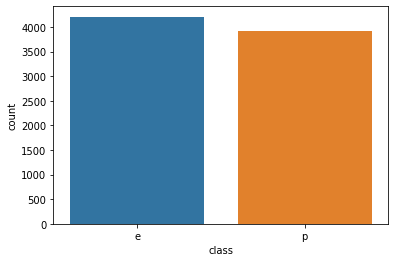

In [6]:
sns.countplot(mush['class'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(mush.drop("class", axis=1), mush["class"])

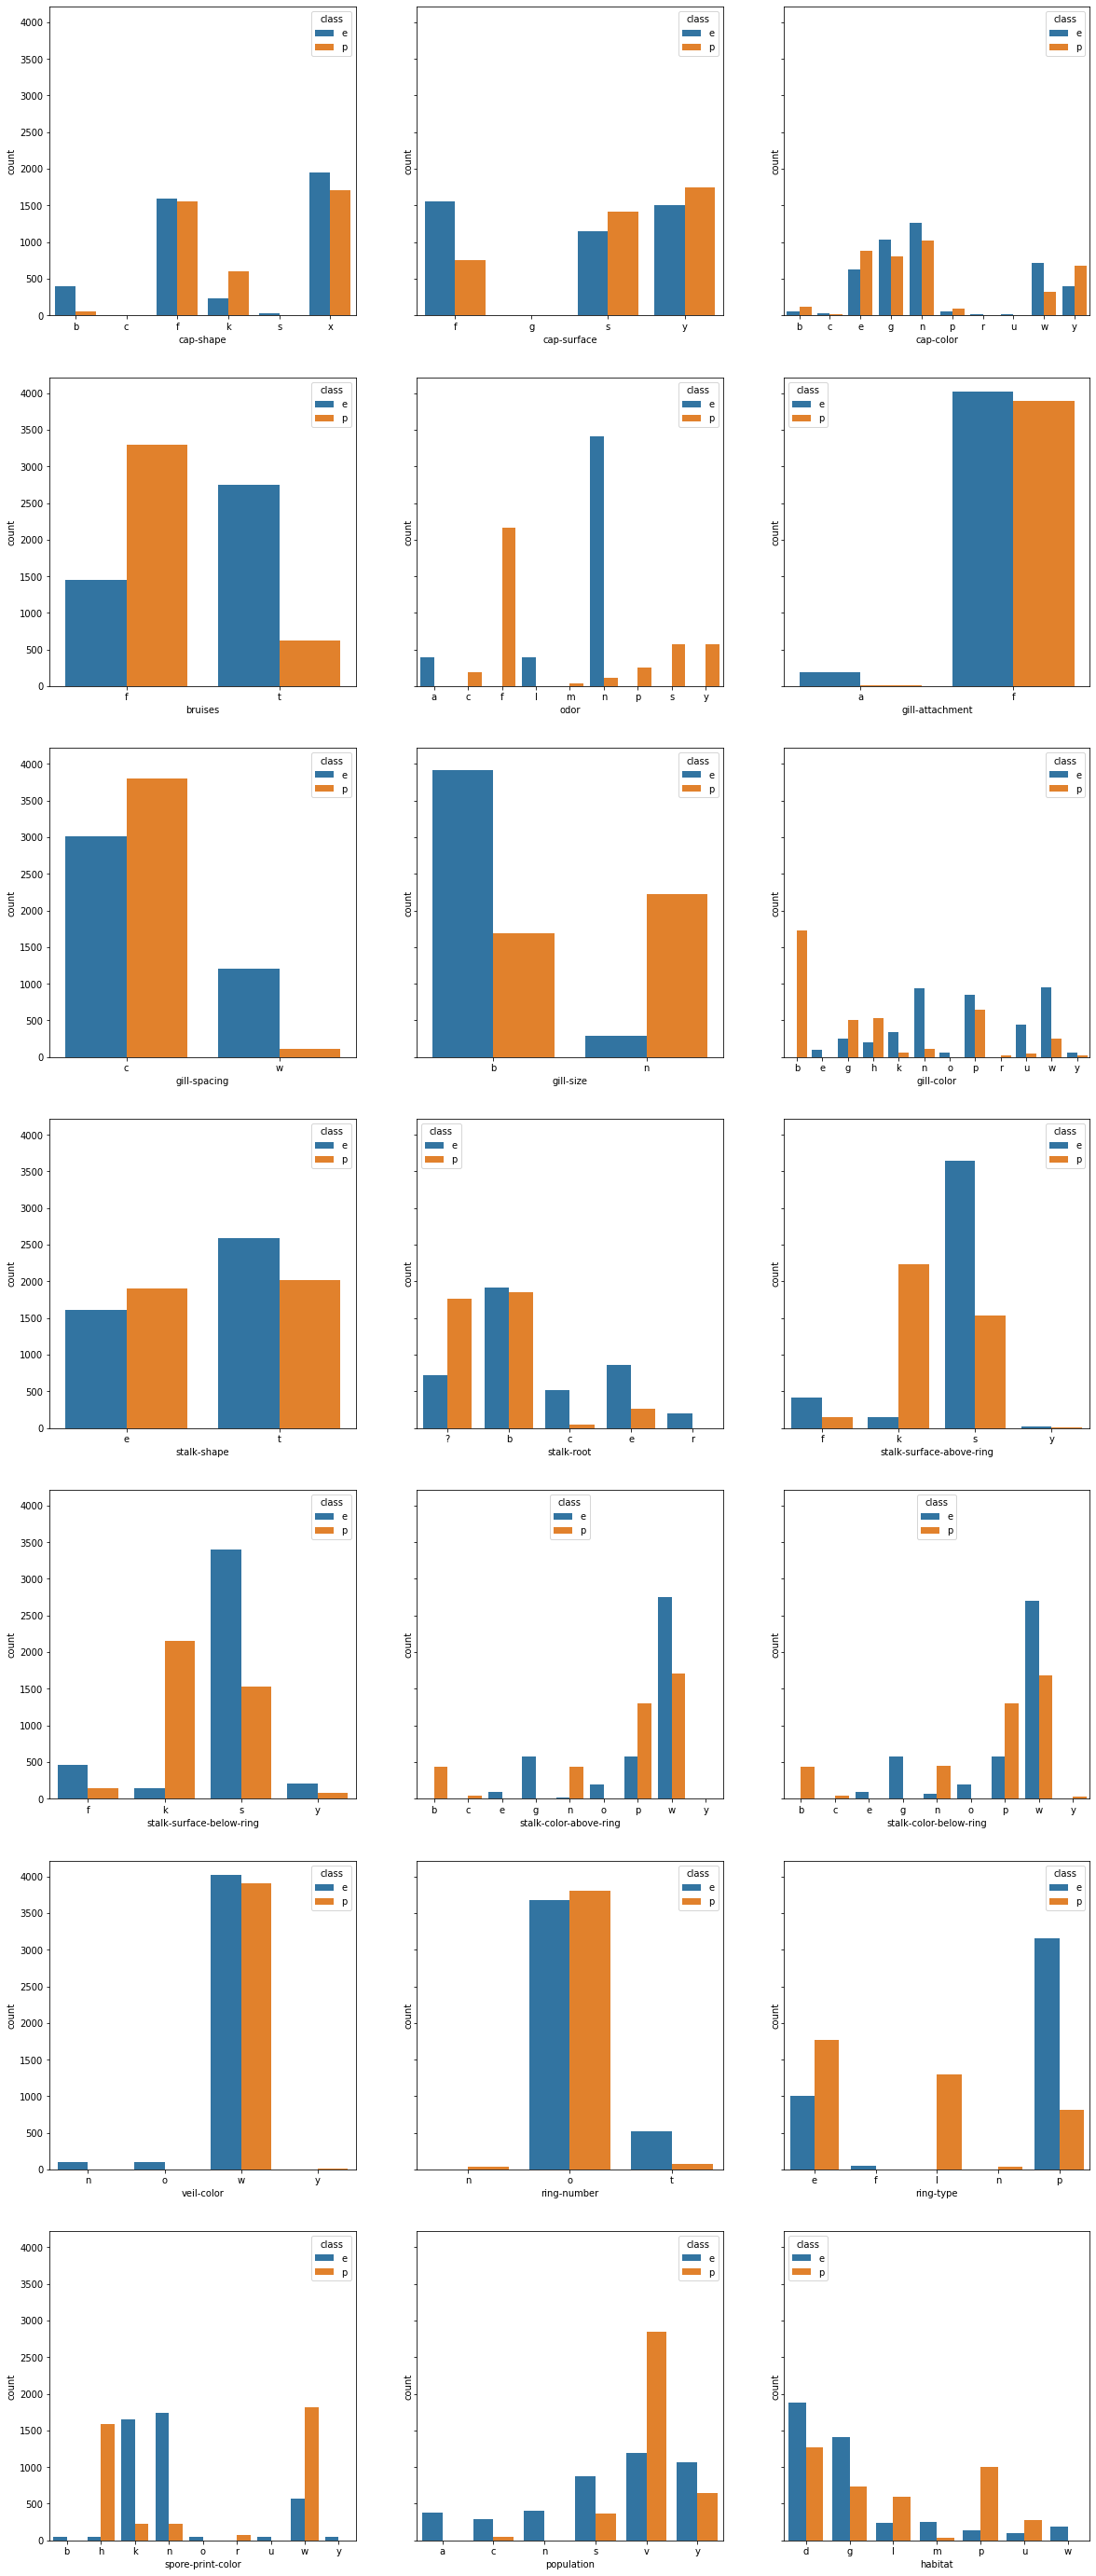

In [8]:
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(20,50),sharey=True)
idx = 0
for col in mush.columns[1:]:
    sns.countplot(data=mush,x=col, hue='class' ,ax=axes[idx//3][idx%3])
    idx += 1

In [9]:
##Data processing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in mush.columns:
    mush = mush.apply(le.fit_transform)


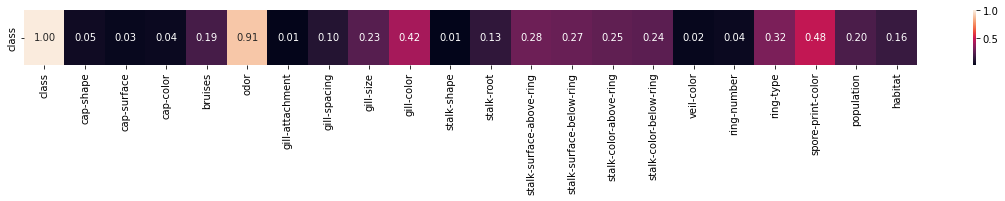

In [32]:
import math #mathematical functions
import scipy.stats as ss #math operations
from collections import Counter
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x   
#correlation viz
theilu = pd.DataFrame(index=['class'])
columns = mush.columns
for j in range(0,len(columns)):
    u = theil_u(mush['class'].tolist(),mush[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

In [10]:
dfX = mush.iloc[:,1:]
dfY = mush['class']
dfX.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
skf = KFold(n_splits=10, shuffle=True)


In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
accurecy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accurecy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(dfX.iloc[_test])
        print(confusion_matrix(dfY.iloc[_test],ypred), '\n')
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(dfY.iloc[_test],ypred))
        model_accurecy.append(accuracy_score(dfY.iloc[_test],ypred))
    print('='*100)
    print('The average accurecy of this model is {:.02f}%'.format(np.array(model_accurecy).mean()*100))
    accurecy_report[modelname] = round(np.array(model_accurecy).mean()*100,2)    


In [17]:
rf_model = RandomForestClassifier()
trainwith(rf_model)


===============================using model: RandomForestClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[421   0]
 [  0 392]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       421
           1       1.00      1.00      1.00       392

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[451   0]
 [  0 362]] 

------------------------Classification Report------------------------- 

              precisio

In [47]:
#one hot label encoding
features = mush.iloc[:,1:]
features = pd.get_dummies(features)
target = mush.iloc[:,0].replace({'p': 0, 'e': 1})
print('First 5 rows of new encoded feature columns:\n',features.head())
print('First 5 rows of new encoded target class of mushroom poisonous = 0 edible = 1:\n',target.head())
X = features.values
y = target.values

First 5 rows of new encoded feature columns:
    cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7  

In [24]:
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state=29)
target_names = ['poisonous', 'edible']
print ('X_train Shape:', X_train.shape)
print ('X_test Shape:', X_test.shape)
print ('y_train Shape:', y_train.shape)
print ('y_test Shape:', y_test.shape)


X_train Shape: (5686, 21)
X_test Shape: (2438, 21)
y_train Shape: (5686,)
y_test Shape: (2438,)



Decision tree confusion matrix: 
 [[1174   63]
 [  41 1160]]

Decision tree classification report: 
               precision    recall  f1-score   support

   poisonous       0.97      0.95      0.96      1237
      edible       0.95      0.97      0.96      1201

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



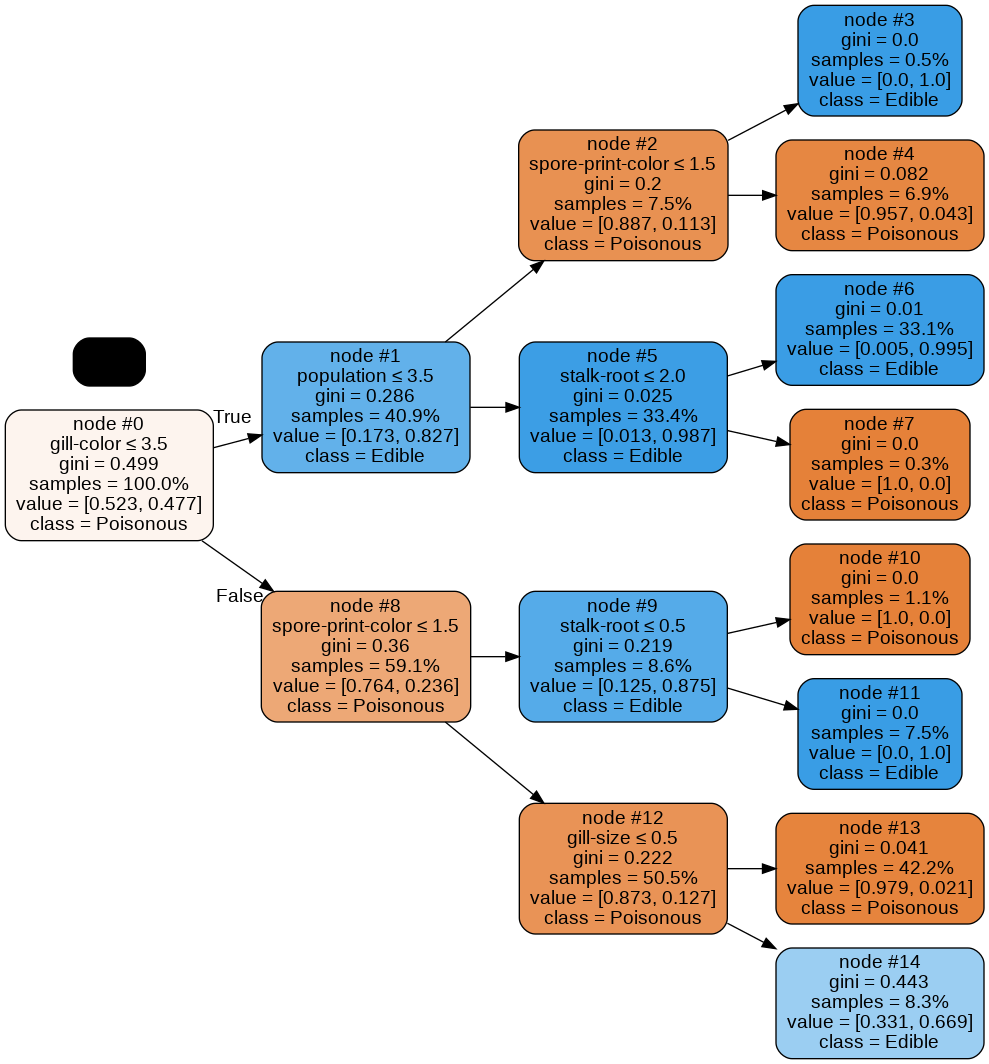

In [27]:
#calling the decision tree classifier from sklearn and graphiz for visuals
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# setting the classifier parameters
dtree = tree.DecisionTreeClassifier(max_depth=3)
#Fitting decision tree to training set
dtree.fit(X_train, y_train)
#Predicting values on test set
dtree_predict = dtree.predict(X_test)
#report the results
print("\nDecision tree confusion matrix: \n",confusion_matrix(y_test, dtree_predict))
print("\nDecision tree classification report: \n",classification_report(y_test,dtree_predict,target_names=target_names))
#test
# print(accuracy_score(y_test,dtree_predict)) #raw_score
dtree_viz = export_graphviz(dtree, out_file=None, 
                         feature_names=features.columns,  
                         filled=True, rounded=True,  
                         special_characters=True,
                         impurity=True,proportion=True,
                         rotate=True,node_ids=True,
                         class_names=['Poisonous','Edible'])  
import pydotplus #convert graphviz viz from svg to png
# Draw graph
graph = pydotplus.graph_from_dot_data(dtree_viz)  

from IPython.display import Image  
# Show graph as png since it default output it as svg
Image(graph.create_png())
